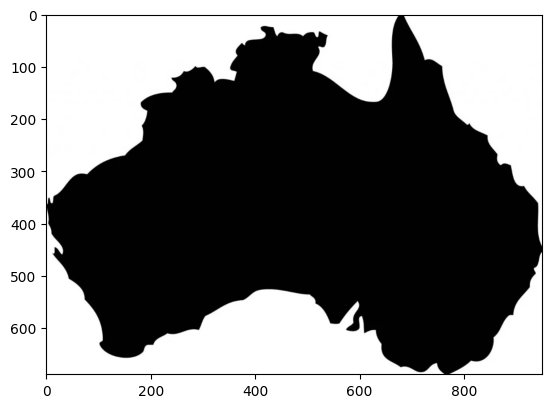

In [669]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
cv_image = cv2.imread("..\Australia.png")
plt.imshow(cv_image)
plt.show()

In [670]:
import random
import numpy as np

epsilon = 0.001

def if_point_in_square(left, lower, right, upper, x, y):
    return (x >= left and x <= right and y <= upper and y >= lower)

def MonteCarlo(circles, left, lower, right, upper, cv_image, treshold = 0.4):
    cnt = 0
    min_x = min(left, right)
    max_x = max(left, right)
    min_y = min(upper, lower)
    max_y = max(upper, lower)
    
    if min_x < 0 or min_y < 0 or max_x < 0 or max_y < 0:
        return False

    if min_x >= cv_image.shape[1] or min_y >= cv_image.shape[0] or max_x >= cv_image.shape[1] or max_y >= cv_image.shape[0]:
        return False
    
    for i in range(0, circles):
        random.seed(2 * i + 1)
        x = random.randint(min_x, max_x)
        y = random.randint(min_y, max_y)
        
        if if_point_in_square(min_x, min_y, max_x, max_y, x, y) and np.all(cv_image[y][x] == np.array([1, 1, 1])):
            cnt += 1
    
    if cnt * 1. / circles >= treshold:
        #print(cnt)
        return True
    return False


In [671]:
from PIL import Image, ImageDraw

def split_image_and_draw_grid(image_path, num_rows, num_cols, circles):
    # Open the image
    image = Image.open(image_path)
    draw = ImageDraw.Draw(image)

    # Get image size
    width, height = image.size

    # Calculate rectangle dimensions
    rect_width = width // num_cols
    rect_height = height // num_rows

    # Create a NumPy array representing the image
    cv_image = np.array(image)

    rectangles_coordinates = []

    # Draw grid and apply Monte Carlo
    for i in range(num_rows):
        for j in range(num_cols):
            left = j * rect_width
            upper = i * rect_height
            right = left + rect_width
            lower = upper + rect_height

            # Apply Monte Carlo
            if MonteCarlo(circles, left, lower, right, upper, cv_image):
                # Draw rectangles
                draw.rectangle([left, upper, right, lower], outline='red')
                rectangles_coordinates.append([(left, upper), (right, upper), (right, lower), (left, lower)])

    # Display the image with the drawn rectangles
    #image.show()
    image.save("squares.png")

    return rectangles_coordinates, rect_width, rect_height

# Path to the image
image_path = "..\Australia.png"

# Grid dimensions
num_rows = 5
num_cols = 5

# Parameters for Monte Carlo
circles = 1000
threshold = 0.5

# Get coordinates of rectangles and draw the grid
coordinates, width, hight = split_image_and_draw_grid(image_path, num_rows, num_cols, circles)

# Output coordinates of each rectangle
#for i, coord in enumerate(coordinates, start=1):
#    print(f"Rectangle {i} coordinates: {coord}")


In [672]:
id_coord = []
for coordinate in coordinates:
    for i in range(0, len(coordinate)):
        id_coord.append(coordinate[i])

id_coord = (list(set(id_coord)))
id_coord.sort()

In [673]:
matrix_np = np.zeros((len(id_coord), len(id_coord)))
a_x = 1.
a_y = 1.

is_on_board = []
for i in range(0, len(id_coord)):
    cnt1 = 0
    cnt2 = 0
    cnt3 = 0
    cnt4 = 0
    max_1 = 0
    max_2 = 0
    max_3 = 0
    max_4 = 0

    for s in range(0, len(id_coord)):  #выше
        if (i != s and id_coord[i][0] == id_coord[s][0]):
                if  id_coord[s][1] - id_coord[i][1] >= max_1:
                    max_1 = id_coord[s][1] - id_coord[i][1]

    cnt1 = max_1 / hight

    for s in range(0, len(id_coord)): #ниже
        if (i != s and id_coord[i][0] == id_coord[s][0]):
                if  id_coord[i][1] - id_coord[s][1] >= max_2:
                    max_2 = id_coord[i][1] - id_coord[s][1]

    cnt2 = max_2 / hight


    for s in range(0, len(id_coord)):  # левее
        if (i != s and id_coord[i][1] == id_coord[s][1]):
                if  id_coord[i][0] - id_coord[s][0] >= max_3:
                    max_3 = id_coord[i][0] - id_coord[s][0]

    cnt3 = max_3 / width

    for s in range(0, len(id_coord)):  # правее
        if (i != s and id_coord[i][1] == id_coord[s][1]):
                if  id_coord[s][0] - id_coord[i][0] >= max_4:
                    max_4 = id_coord[s][0] - id_coord[i][0]

    cnt4 = max_4 / width
    if min(cnt1, cnt2, cnt3, cnt4) == 0:
         is_on_board.append(i)
    #print ("cnt1 ", cnt1, " cnt2 ", cnt2, " cnt3 ", cnt3, " cnt4 ", cnt4 )
    
    for j in range(0, len(id_coord)):
        
        if (cnt3 >= 2 and cnt4 >= 2):
            if i == j:
                matrix_np[i][j] += -5./2 * (a_x)
            if (id_coord[i][1] == id_coord[j][1] and abs(id_coord[i][0] - id_coord[j][0]) == width):
                matrix_np[i][j] = a_x * (4./3)
            if (id_coord[i][1] == id_coord[j][1] and abs(id_coord[i][0] - id_coord[j][0]) == 2 * width):
                matrix_np[i][j] = a_x * (-1./12)
        

        if (cnt1 >= 2 and cnt2 >= 2):
            if i == j:
                matrix_np[i][j] += -5./2 * (a_y)
            if (id_coord[i][0] == id_coord[j][0] and abs(id_coord[i][1] - id_coord[j][1]) == hight):
                matrix_np[i][j] = a_y * (4./3)
            if (id_coord[i][0] == id_coord[j][0] and abs(id_coord[i][1] - id_coord[j][1]) == 2 * hight):
                matrix_np[i][j] = a_y * (-1./12)
          

        # схема второго порядка
        if (min(cnt3, cnt4) == 1):
            if i == j:
                matrix_np[i][j] += -2. * (a_x)
            if (id_coord[i][1] == id_coord[j][1] and abs(id_coord[i][0] - id_coord[j][0]) == width):
                matrix_np[i][j] = a_x * (1.)

        if (min(cnt1, cnt2) == 1):
            if i == j:
                matrix_np[i][j] += -2. * (a_y)
            if (id_coord[i][0] == id_coord[j][0] and abs(id_coord[i][1] - id_coord[j][1]) == hight):
                matrix_np[i][j] = a_y * (1.)
 

        if (cnt3 == 0 or cnt4 == 0):
            
            if i == j:
                 matrix_np[i][j] += -2. * (a_x)

            if (id_coord[i][1] == id_coord[j][1] and abs(id_coord[i][0] - id_coord[j][0]) == 1. * width):
                 matrix_np[i][j] = a_x * (2.)


        if (cnt1 == 0 or cnt2 == 0):
            if i == j:
                 matrix_np[i][j] += -2. * (a_y)

            if (id_coord[i][0] == id_coord[j][0] and abs(id_coord[i][1] - id_coord[j][1]) == 1. * hight):
                    matrix_np[i][j] = a_y * (2.)


   # print(" Этап ", i)
print(type(matrix_np))

<class 'numpy.ndarray'>


In [674]:
is_on_board

[0, 1, 2, 3, 6, 7, 11, 12, 17, 18, 19, 20, 21, 22]

In [675]:
X_start = []
for i in range(0, len(id_coord)):
    if i % 2 == 1:
        X_start.append(4.)

    else:
        X_start.append(5.)


Nt = 12000
tmax = 1.2

t_array = np.linspace(0.,tmax, Nt)
dt = t_array[1] - t_array[0]
dh = 1.
nt = len(t_array)
X = []
X.append(X_start) 
m = -1.
omega = 1.

identity_matrix = np.eye(len(id_coord))




In [676]:
def MNK():
    
    rightX = []
    for j in range(0, len(id_coord)):
        if not (j  in is_on_board):
            rightX.append(X[0][j])
        else:
            rightX.append(X[0][j] + dt *(1 + m * np.cos(omega * 1 * dt)))
    
    b_matrix = identity_matrix + np.array(matrix_np)* dt / (dh ** 2) * 1.
    inverse_matrix = np.linalg.inv(np.array(b_matrix))

    resX = inverse_matrix @ rightX
    X.append(resX)

    rightX = []
    b_matrix = identity_matrix + np.array(matrix_np)* dt / (dh ** 2) * -2./3
    inverse_matrix1 = np.linalg.inv(np.array(b_matrix))
    
    a2 = 4/3
    a3 = -1/3
    for j in range(0, len(id_coord)):
        if not (j  in is_on_board):
            rightX.append(a2 * X[1][j] + a3 * X[0][j])
        else:
            rightX.append(a2 * X[1][j] + a3 * X[0][j] + dt *(1 + m * np.cos(omega * 2 * dt))* -2./3)
    
    resX = inverse_matrix1 @ rightX
    X.append(resX)


    for i in range(3, Nt):
    
        alpha1 = 18/11
        alpha2 = -9/11
        alpha3 = 2/11
        rightX = []
        b_matrix = identity_matrix + np.array(matrix_np)* dt / (dh ** 2) * -6./11
        inverse_matrix2 = np.linalg.inv(np.array(b_matrix))
        
        for j in range(0, len(id_coord)):
            if not (j  in is_on_board):
                rightX.append(alpha3 * X[i-3][j]+ alpha2 * X[i-2][j] + alpha1 * X[i-1][j]) 
            else:
                rightX.append(alpha3 * X[i-3][j]+ alpha2 * X[i-2][j] + alpha1 * X[i-1][j] + dt *(1 + m * np.cos(omega * i * dt)) * -6./11) 
        
        
        resX = inverse_matrix2 @ rightX
        X.append(resX)

In [677]:
MNK()

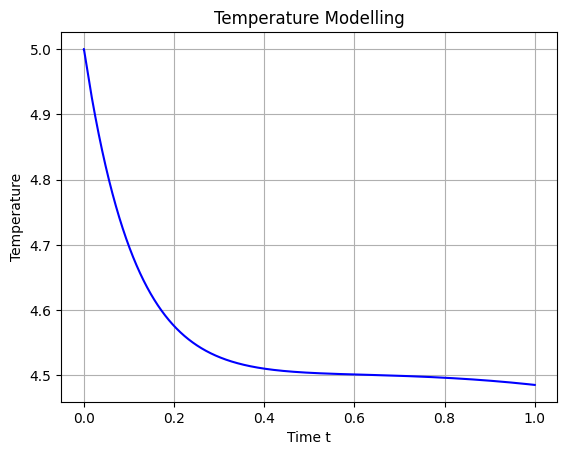

In [678]:
import matplotlib.pyplot as plt

t_array = np.linspace(0.,tmax, Nt)
list_x = []

ind = 9
for i in range(0, len(X)):
    list_x.append(X[i][ind])
    
    
plt.figure()
plt.grid()
plt.title("Temperature Modelling")
plt.plot(t_array[0:10000], list_x[0:10000], 'b')


plt.xlabel('Time t')
plt.ylabel('Temperature')

plt.show()

In [679]:
all_res = []
for j in range(0, 100):
    vec_1 = []
    vec_2 = []
    for i in range(0, len(id_coord)):
        z = random.uniform(0., 1)
        if i % 2 == 1:
            p = 1.05 * z
        else:
            p = 0.95 * z
        vec_1.append(z)
        vec_2.append(p)
    res1 = np.linalg.norm(inverse_matrix @ vec_1 - inverse_matrix @ vec_2)
    all_res.append(res1)
np.max(all_res)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 23 is different from 6)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


100


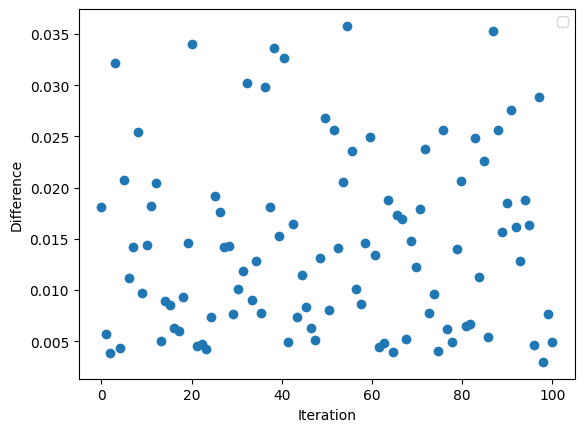

In [ ]:
iterations = np.linspace(0, 100, 100)
print(len(iterations))
plt.scatter(iterations, all_res)
plt.xlabel("Iteration")
plt.ylabel('Difference')
plt.legend()
plt.show()